     |████████████████████████████████| 22.2 MB 190 kB/s             MB/s eta 0:00:04��█████████▍  | 20.4 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 309 kB 35.1 MB/s            
Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.

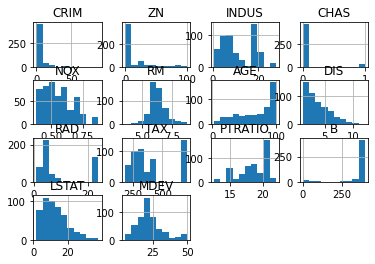

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


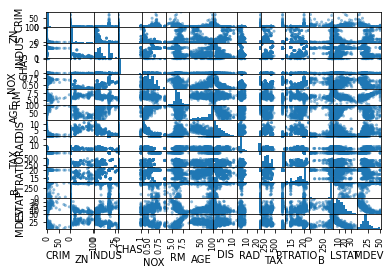

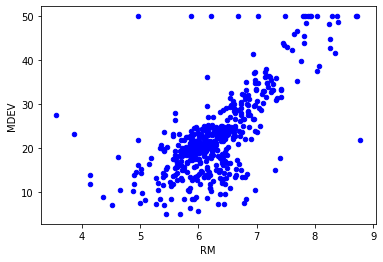

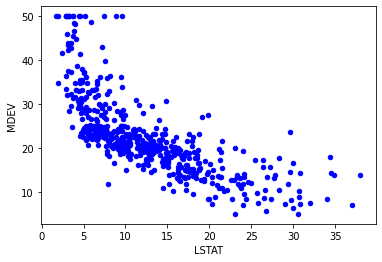

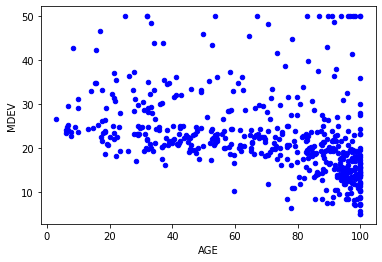

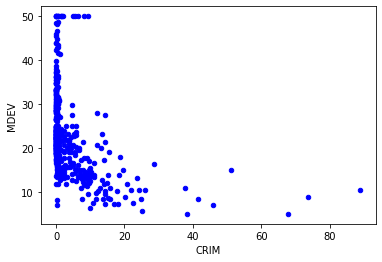

[-25.5685118  -16.46640281  -7.36429383]
Mean Absolute Error: 4.31
Mean Squared Error: 46.52
Root Mean Squared Error: 6.82


In [2]:
#!pip install scikit-learn
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as mp
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


# Loading Dataset
def load_dataset():
    url = "https://storage.googleapis.com/qwasar-public/track-ds/boston.csv"
    dataset = pd.read_csv(url)
    return dataset

boston_dataframe = load_dataset()

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print()
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print()
    print("Statistical summary:")
    print(dataset.describe())
    print()
    
print_summarize_dataset(boston_dataframe)

def clean_dataset(dataset):
    return dataset.dropna()

clean_dataset(boston_dataframe)

def print_histograms(dataset):
    dataset.hist()
    pyplot.show()

print_histograms(boston_dataframe)

def compute_correlations_matrix(dataset):
    corrM = dataset.corr(method = 'pearson')
    return corrM
   
correlations = compute_correlations_matrix(boston_dataframe)
print(correlations['MDEV'])

def print_scatter_matrix(dataset):
    scatter_matrix(dataset)
    pyplot.show()

print_scatter_matrix(boston_dataframe)

def two_var_plot(dataset): #function for plotting two variables graphs
    v2 = 'MDEV'
       
    df = pd.DataFrame(columns=['RM', v2])
    ax1 = dataset.plot.scatter(x='RM', y=v2, c='Blue') #here you enter your pd dataset
    mp.show()
   
    df = pd.DataFrame(columns=['LSTAT', v2])
    ax1 = dataset.plot.scatter(x='LSTAT', y=v2, c='Blue')
    mp.show()
   
    df = pd.DataFrame(columns=['AGE', v2])
    ax1 = dataset.plot.scatter(x='AGE', y=v2, c='Blue')
    mp.show()
   
    df = pd.DataFrame(columns=['CRIM', v2])
    ax1 = dataset.plot.scatter(x='CRIM', y=v2, c='Blue')
    mp.show()

two_var_plot(boston_dataframe)


def boston_fit_model(dataset):
    # SELECT two columns from our
    model_dataset = dataset[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
   
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values # 1 column # Number of rooms, all the columns except the last one
    # Extract column 2
    y = model_dataset.iloc[:, 1].values # 14 columns # Price
   
    # Train the model
    model = regressor.fit(x, y)
   
    return model


estimator = boston_fit_model(boston_dataframe)
data = [1, 2, 3] # enter your values here

def boston_predict(estimator, array_to_predict):
   
    #new_array = array_to_predict.reshape(-1, 1)
    array = np.array(array_to_predict)
    new_array = array.reshape(-1, 1)
    #print(new_array)
   
    score = estimator.predict(new_array)
   
    return score
   
print(boston_predict(estimator, data))


def base_test_value(dataset):
    # SELECT two columns from our
    model_dataset = dataset[["RM","MDEV"]]
    #print(model_dataset)
    regressor = sklearn.linear_model.LinearRegression()
   
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values # 1 column # Number of rooms, all the columns except the last one
    # Extract column 2
    y = model_dataset.iloc[:, 1].values # 14 columns # Price
   
    # Train the model
    model = regressor.fit(x, y)
   
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
   
    return y_test
   

base_test = base_test_value(boston_dataframe)

def prediction_value(dataset):
    # SELECT two columns from our
    model_dataset = dataset[["RM","MDEV"]]
    #print(model_dataset)
    regressor = sklearn.linear_model.LinearRegression()
   
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values # 1 column # Number of rooms, all the columns except the last one
    # Extract column 2
    y = model_dataset.iloc[:, 1].values # 14 columns # Price
   
    # Train the model
    model = regressor.fit(x, y)
   
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
   
    y_test_pred = model.predict(X_test)
    #print(model.score(X_test, y_test))
   
    return y_test_pred
   

prediction = prediction_value(boston_dataframe)

def print_model_prediction_evaluator(base_test, prediction):
   
    mae = mean_absolute_error(base_test, prediction)
    mse = mean_squared_error(base_test, prediction)
    rmse = np.sqrt(mse)
   
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
   
   
print_model_prediction_evaluator(base_test, prediction)  
